In [1]:
import pickle
import sys
sys.path.insert(0,'../code/')
from shared import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
with open(f'{resultpath}bigmresults/milp.pickle','rb') as f:
    t = pickle.load(f)
K = 5
F = 5

results = defaultdict(dict)
for k in range(2, K+1):
    for f in range(2, F+1):
            results[k][f] = t[k-2][f-2]

tracts = results[2][2].index.values.tolist()

In [3]:
average_values = {}
for k,fs in results.items():
    average_values[k] = {}
    for f, r in fs.items():
        average_values[k][f] = {}
        for m in set(r.model.values):
            average_values[k][f][m] = defaultdict(list)
            t = r[r.model == m].mean()
            for tk, tv in t.items():
                average_values[k][f][m][tk].append(tv)
            for tk,tv in average_values[k][f][m].items():
                average_values[k][f][m][tk] = np.mean(tv)

In [4]:
av = pd.DataFrame()
av['k'] = 0
av['f'] = 0
for k in average_values[5][5][1].keys():
    av[k] = ''
n = []
for k, fs in average_values.items():
    for f, ms in fs.items():
        assignments = defaultdict(list)
        for v,tk in (zip(
            results[
                k][
                f].index.values.tolist(),
            results[k
                   ][
                f]['model'].values.tolist())):
            assignments[tk].append(v)
        for m, cs in ms.items():
            t = {
                'k':k,
                'f':f,
            }
            for c, v in cs.items():
                t[c] = v
            for col in av.columns:
                if col not in t.keys():
                    t[col] = 'N/A'
            t['assignments'] = assignments[m]
            n.append(t)
av = pd.DataFrame(n)
print(av.columns)
av = av[['k','f','model','col', 'prof', 'own', 'nhwht', 'lep','assignments']]
av.to_csv('/home/alex/Desktop/milp_weight_averages.csv')

Index(['assignments', 'col', 'f', 'flabf', 'incpc', 'k', 'model', 'multi',
       'own', 'prof'],
      dtype='object')


KeyError: "['lep', 'nhwht'] not in index"

In [5]:
bv = []
features = ['col', 'prof', 'own', 'nhwht', 'lep','incpc']
for i in range(len(av)):
    t = {}
    k = av.iat[i,0]
    f = int(av.iat[i,1])
    d = readindata_std('incpc',f)
    model = av.iat[i,2]
    assignments = av.iat[i,8]
    fdict = defaultdict(list)
    for asmt in assignments:
        for feat in features[0:f]:
            fdict[feat].append(
                d[d.trtid == asmt][feat].values[0]
            )
        fdict['incpc'].append(
            d[d.trtid == asmt]['incpc'].values[0]
        )
    for feat in features:
        t[feat] = np.mean(fdict[feat])
    t['k'] = k
    t['f'] = f
    t['model'] = av.iat[i,2]
    bv.append(t)
bv = pd.DataFrame(bv)

In [6]:
bv = bv[['k','f','model','col', 'prof', 'own', 'nhwht', 'lep','incpc']]
bv.to_csv('/home/alex/Desktop/milp_feature_averages.csv')

In [7]:
av

,k,f,model,col,prof,own,nhwht,lep,assignments
0,2,2,1.0,1.814367,1.582912,N/A,N/A,N/A,"[36061000202, 36061000600, 36061001200, 360610..."
1,2,2,2.0,1.421719,1.231471,N/A,N/A,N/A,"[36061000800, 36061004000, 36061004200, 360610..."
2,2,3,1.0,1.633614,1.418218,1.32833,N/A,N/A,"[36061000600, 36061001401, 36061001402, 360610..."
3,2,3,2.0,1.655382,1.443189,1.67998,N/A,N/A,"[36061000202, 36061000800, 36061001200, 360610..."
4,2,4,1.0,1.658726,1.441168,1.68261,1.94854,N/A,"[36061000202, 36061000800, 36061001200, 360610..."
5,2,4,2.0,1.630823,1.421204,1.33754,1.72287,N/A,"[36061000600, 36061001401, 36061001402, 360610..."
6,2,5,1.0,1.660294,1.438129,1.68768,1.95874,1.74965,"[36061000202, 36061000800, 36061002800, 360610..."
7,2,5,2.0,1.629515,1.424570,1.33618,1.71487,1.47094,"[36061000600, 36061001200, 36061001401, 360610..."
8,3,2,1.0,1.782751,1.564581,N/A,N/A,N/A,"[36061000202, 36061000600, 36061001200, 360610..."
9,3,2,2.0,1.492798,1.300603,N/A,N/A,N/A,"[36061000800, 36061004000, 36061004200, 360610..."


In [8]:
bv

,k,f,model,col,prof,own,nhwht,lep,incpc
0,2,2,1.0,1.814367,1.582912,NaN,NaN,NaN,0.590605
1,2,2,2.0,1.421719,1.231471,NaN,NaN,NaN,0.233384
2,2,3,1.0,1.633614,1.418218,1.328332,NaN,NaN,0.594495
3,2,3,2.0,1.655382,1.443189,1.679980,NaN,NaN,0.296919
4,2,4,1.0,1.658726,1.441168,1.682608,1.948542,NaN,0.290774
5,2,4,2.0,1.630823,1.421204,1.337542,1.722874,NaN,0.590844
6,2,5,1.0,1.660294,1.438129,1.687676,1.958741,1.749649,0.289204
7,2,5,2.0,1.629515,1.424570,1.336180,1.714866,1.470937,0.589095
8,3,2,1.0,1.782751,1.564581,NaN,NaN,NaN,0.468928
9,3,2,2.0,1.492798,1.300603,NaN,NaN,NaN,0.194168


In [9]:
silhouettes = defaultdict(dict)
for i in range(2, K+1):
    for j in range(2, F+1):
        l = []
        for k in range(1):
            l.append(silhouette_score(
                results[i][j]
                .iloc[:,0:f-2].values,
                labels=results[i][j]
                .model.values
            ))
        silhouettes[i][j] = np.mean(l)

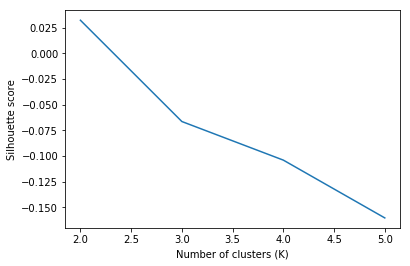

In [10]:
plt.plot(pd.DataFrame(silhouettes).mean(axis=0))
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.savefig(f'{resultpath}kmeans/silhouette.png',dpi=300)

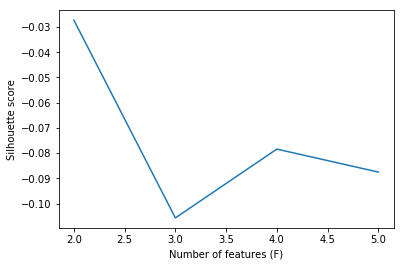

In [11]:
plt.plot(pd.DataFrame(silhouettes).mean(axis=1))
plt.xlabel('Number of features (F)')
plt.ylabel('Silhouette score')
plt.savefig(f'{resultpath}kmeans/silhouette_features.png',dpi=300)

In [12]:
pd.DataFrame(silhouettes)

,2,3,4,5
2,0.111444,-0.002241,-0.054812,-0.163717
3,-0.002767,-0.078691,-0.126648,-0.214619
4,0.007642,-0.096166,-0.099070,-0.126031
5,0.012479,-0.088980,-0.136012,-0.137510
